In [1]:
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') # this command took too much time to run
x,y = mnist['data'],mnist["target"]

In [2]:
x
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
some_digit = x.iloc[34534]
digit = some_digit.to_numpy()
digit_image = digit.reshape(28,28)
digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

(-0.5, 27.5, 27.5, -0.5)

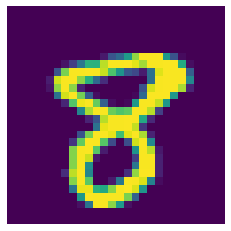

In [5]:
plt.imshow(digit_image)
plt.axis("off")

In [6]:
train,test = x.iloc[:60000],x.iloc[60000:]
y_train,y_test = y.iloc[:60000],y.iloc[60000:]
import numpy as np
np.random.seed(0)
shuffle_index = np.random.permutation(60000)
train = train.to_numpy()
rain,y_train = train[shuffle_index],y_train[shuffle_index]
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [7]:
clf = RandomForestClassifier()

In [8]:
clf.fit(train,y_train)
clf.predict(test)

array([9, 2, 2, ..., 3, 0, 2])

In [9]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: int32

In [10]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf,train,y_train,cv=3,scoring ="accuracy")

In [12]:
accuracy.mean()

0.09961666666666665

In [13]:
from joblib import dump, load
dump(clf, 'RandomForestClassifier.joblib') 

['RandomForestClassifier.joblib']